In [1]:
!pip install sparse_lmm


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np


clinical_data = pd.read_csv(r'C:\Users\张宇强\Desktop\TCGA.BRCA.sampleMap_BRCA_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv(r'C:\Users\张宇强\Desktop\HiSeqV2_PANCAN', sep='\t', index_col=0)

In [4]:
gene_data

,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,TCGA-PE-A5DC-01,...,TCGA-A7-A13E-11,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-AC-A2FB-11,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-BH-A1EV-11,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.356592,-2.429392,-0.542392,-0.844192,-0.222292,-0.097492,0.229108,-0.711592,0.075808,-0.235292,...,-0.237492,0.318608,0.055908,0.045008,0.169408,1.650408,0.710508,-0.459192,1.082808,0.452408
HIF3A,-3.976026,-1.894026,-2.832326,-4.213326,-4.972826,-5.280926,-1.945726,-5.080926,-2.616926,-1.441126,...,2.599874,-3.338826,-1.690226,2.632474,-4.671126,-4.237826,-1.485126,1.698974,-4.623726,-3.135626
RNF17,-0.531035,0.093465,0.021565,-0.531035,-0.531035,0.345465,-0.531035,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,3.199465,-0.531035,-0.531035,0.601865,-0.105235,-0.531035,-0.531035,-0.531035
RNF10,-0.409972,0.140528,0.188928,1.410528,0.226028,0.034228,-0.395572,-0.277172,0.427928,0.353628,...,0.209328,0.487728,0.703928,0.048728,0.235928,-0.195772,0.088728,-0.231572,0.484028,0.379428
RNF11,0.161322,2.559422,0.442622,0.123222,0.286622,-0.112478,-0.201578,-0.532078,0.253122,-0.166578,...,0.966522,0.443822,-0.477678,0.607522,-0.130878,-0.694278,-0.203478,0.909522,-0.183678,0.274122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PTRF,1.987914,-1.186286,1.104414,0.436914,-0.559086,0.878214,-0.074786,0.914414,0.235914,0.491214,...,2.477414,0.357714,1.090914,2.631314,-0.577286,-0.632386,0.861914,1.220214,0.660514,-2.380286
BCL6B,-0.081627,-0.217927,0.872773,0.238973,0.253973,1.266073,0.443073,1.520773,0.896373,1.438473,...,2.313873,0.091073,0.529073,1.725973,0.273673,1.021673,1.601073,1.241673,1.295073,-1.357227
GSTK1,0.297105,-1.964495,0.208205,0.170705,-0.441995,-0.615995,-0.377895,0.269905,0.321005,0.514205,...,0.561405,0.360005,-0.022995,0.280505,-0.354295,-0.177995,-0.004095,-0.160695,0.915105,0.461105


In [5]:
clinical_data.head()

,AJCC_Stage_nature2012,Age_at_Initial_Pathologic_Diagnosis_nature2012,CN_Clusters_nature2012,Converted_Stage_nature2012,Days_to_Date_of_Last_Contact_nature2012,Days_to_date_of_Death_nature2012,ER_Status_nature2012,Gender_nature2012,HER2_Final_Status_nature2012,Integrated_Clusters_no_exp__nature2012,...,_GENOMIC_ID_TCGA_BRCA_mutation_wustl_gene,_GENOMIC_ID_TCGA_BRCA_miRNA_GA,_GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_percentile,_GENOMIC_ID_data/public/TCGA/BRCA/miRNA_GA_gene,_GENOMIC_ID_TCGA_BRCA_gistic2thd,_GENOMIC_ID_data/public/TCGA/BRCA/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_BRCA_G4502A_07_3,_GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2,_GENOMIC_ID_TCGA_BRCA_gistic2,_GENOMIC_ID_TCGA_BRCA_PDMarray
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6ef883fc-81f3-4089-95e0-86904ffc0d38,NaN,TCGA-3C-AAAU-01A-11D-A41E-01,TCGA-3C-AAAU-01,NaN,6ef883fc-81f3-4089-95e0-86904ffc0d38,TCGA-3C-AAAU-01A-11D-A41E-01,NaN
TCGA-3C-AALI-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,dd8d3665-ec9d-45be-b7b9-a85dac3585e2,NaN,TCGA-3C-AALI-01A-11D-A41E-01,TCGA-3C-AALI-01,NaN,dd8d3665-ec9d-45be-b7b9-a85dac3585e2,TCGA-3C-AALI-01A-11D-A41E-01,NaN
TCGA-3C-AALJ-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,c924c2a8-ab41-4499-bb30-79705cc17d45,NaN,TCGA-3C-AALJ-01A-31D-A41E-01,TCGA-3C-AALJ-01,NaN,c924c2a8-ab41-4499-bb30-79705cc17d45,TCGA-3C-AALJ-01A-31D-A41E-01,NaN
TCGA-3C-AALK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1a19e068-d213-41ef-aebb-104017a883cc,NaN,TCGA-3C-AALK-01A-11D-A41E-01,TCGA-3C-AALK-01,NaN,1a19e068-d213-41ef-aebb-104017a883cc,TCGA-3C-AALK-01A-11D-A41E-01,NaN
TCGA-4H-AAAK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2ea9e472-a408-4ae0-975d-50a566f22b2a,NaN,TCGA-4H-AAAK-01A-12D-A41E-01,TCGA-4H-AAAK-01,NaN,2ea9e472-a408-4ae0-975d-50a566f22b2a,TCGA-4H-AAAK-01A-12D-A41E-01,NaN


In [6]:
gene_data.head()

,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,TCGA-PE-A5DC-01,...,TCGA-A7-A13E-11,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-AC-A2FB-11,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-BH-A1EV-11,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.356592,-2.429392,-0.542392,-0.844192,-0.222292,-0.097492,0.229108,-0.711592,0.075808,-0.235292,...,-0.237492,0.318608,0.055908,0.045008,0.169408,1.650408,0.710508,-0.459192,1.082808,0.452408
HIF3A,-3.976026,-1.894026,-2.832326,-4.213326,-4.972826,-5.280926,-1.945726,-5.080926,-2.616926,-1.441126,...,2.599874,-3.338826,-1.690226,2.632474,-4.671126,-4.237826,-1.485126,1.698974,-4.623726,-3.135626
RNF17,-0.531035,0.093465,0.021565,-0.531035,-0.531035,0.345465,-0.531035,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,3.199465,-0.531035,-0.531035,0.601865,-0.105235,-0.531035,-0.531035,-0.531035
RNF10,-0.409972,0.140528,0.188928,1.410528,0.226028,0.034228,-0.395572,-0.277172,0.427928,0.353628,...,0.209328,0.487728,0.703928,0.048728,0.235928,-0.195772,0.088728,-0.231572,0.484028,0.379428
RNF11,0.161322,2.559422,0.442622,0.123222,0.286622,-0.112478,-0.201578,-0.532078,0.253122,-0.166578,...,0.966522,0.443822,-0.477678,0.607522,-0.130878,-0.694278,-0.203478,0.909522,-0.183678,0.274122


In [7]:
gene_fullname = 'BRCA gene'
gene = 'brca'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Breast Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 193 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-AR-A5QQ-01,-0.356592,-3.976026,-0.531035,-0.409972,0.161322,-0.51811,-0.896294,-1.023046,-0.423399,-1.730872,...,-0.166978,-1.587117,0.856067,-0.69949,-0.034577,1.987914,-0.081627,0.297105,2.320067,0.617988
TCGA-D8-A1JA-01,-2.429392,-1.894026,0.093465,0.140528,2.559422,0.37989,-0.188094,-1.707946,-0.423399,0.778128,...,0.310022,-1.587117,-1.372933,2.49791,0.606623,-1.186286,-0.217927,-1.964495,-5.525533,0.002088
TCGA-BH-A0BQ-01,-0.542392,-2.832326,0.021565,0.188928,0.442622,-0.04971,0.325706,0.448854,-0.423399,0.525628,...,-0.748878,1.135283,-0.177033,-1.28139,0.003023,1.104414,0.872773,0.208205,2.850967,-0.183712
TCGA-BH-A0BT-01,-0.844192,-4.213326,-0.531035,1.410528,0.123222,-0.06591,0.149806,-1.507346,-0.423399,-0.676472,...,-0.748878,1.395183,-0.167933,-1.28139,-0.445777,0.436914,0.238973,0.170705,1.532967,-0.742012
TCGA-A8-A06X-01,-0.222292,-4.972826,-0.531035,0.226028,0.286622,-0.34231,0.169306,0.013854,1.377301,-0.856772,...,0.567422,-1.005217,-0.898233,-1.28139,0.075023,-0.559086,0.253973,-0.441995,1.573667,1.053588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-A2-A3XT-01,1.650408,-4.237826,0.601865,-0.195772,-0.694278,-0.54601,-0.197794,-0.382946,1.458001,1.400028,...,1.010722,0.698983,0.578967,-1.28139,0.110923,-0.632386,1.021673,-0.177995,0.158267,0.706788
TCGA-B6-A0X7-01,0.710508,-1.485126,-0.105235,0.088728,-0.203478,-0.00391,0.331706,0.808254,-0.423399,1.226528,...,0.497922,3.811883,-0.891433,-1.28139,0.061323,0.861914,1.601073,-0.004095,3.109267,-0.475612
TCGA-BH-A1EV-11,-0.459192,1.698974,-0.531035,-0.231572,0.909522,0.63229,0.284706,0.748954,0.154001,-1.284072,...,0.696222,4.098083,-0.346133,-0.96399,0.702523,1.220214,1.241673,-0.160695,3.963667,-0.460812
TCGA-3C-AALJ-01,1.082808,-4.623726,-0.531035,0.484028,-0.183678,-0.91901,0.261106,0.687754,-0.423399,-0.087572,...,-0.748878,-0.656117,-0.216733,0.21081,0.101023,0.660514,1.295073,0.915105,0.168567,0.047788


In [8]:
merged_data = clinical_data.join(gene_data.T)

merged_data.head()

,AJCC_Stage_nature2012,Age_at_Initial_Pathologic_Diagnosis_nature2012,CN_Clusters_nature2012,Converted_Stage_nature2012,Days_to_Date_of_Last_Contact_nature2012,Days_to_date_of_Death_nature2012,ER_Status_nature2012,Gender_nature2012,HER2_Final_Status_nature2012,Integrated_Clusters_no_exp__nature2012,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748878,0.565583,-0.767233,-1.28139,-0.271377,-0.492286,0.360373,1.067905,0.076267,-0.392212
TCGA-3C-AALI-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.312922,0.079683,0.475267,1.99661,0.161423,0.273714,0.644673,-0.428695,0.068667,-0.043812
TCGA-3C-AALJ-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748878,-0.656117,-0.216733,0.21081,0.101023,0.660514,1.295073,0.915105,0.168567,0.047788
TCGA-3C-AALK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.415422,-0.178417,-0.211233,-1.28139,0.108023,1.132814,0.496773,0.240105,3.099767,0.112888
TCGA-4H-AAAK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.685222,-0.698717,-0.484233,-1.28139,-0.223577,1.222714,0.225573,-0.301995,0.200067,-0.080212


In [9]:
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,-20211.0,0.607308,-3.194126,-0.531035,-0.145872,0.237422,-0.29921,-0.142694,-0.217446,0.333001,...,-0.748878,0.565583,-0.767233,-1.28139,-0.271377,-0.492286,0.360373,1.067905,0.076267,-0.392212
TCGA-3C-AALI-01,-18538.0,-0.641192,-4.928226,0.095465,0.098128,-0.541978,-0.32291,-0.044694,-0.148846,1.841601,...,0.312922,0.079683,0.475267,1.99661,0.161423,0.273714,0.644673,-0.428695,0.068667,-0.043812
TCGA-3C-AALJ-01,-22848.0,1.082808,-4.623726,-0.531035,0.484028,-0.183678,-0.91901,0.261106,0.687754,-0.423399,...,-0.748878,-0.656117,-0.216733,0.21081,0.101023,0.660514,1.295073,0.915105,0.168567,0.047788
TCGA-3C-AALK-01,-19074.0,0.121608,-2.881526,-0.531035,0.179128,0.039222,-0.45491,0.180306,0.775554,-0.423399,...,0.415422,-0.178417,-0.211233,-1.28139,0.108023,1.132814,0.496773,0.240105,3.099767,0.112888
TCGA-4H-AAAK-01,-18371.0,0.420208,-3.282726,-0.531035,-0.020972,-0.117978,-0.55781,-0.173794,-1.079146,0.465001,...,0.685222,-0.698717,-0.484233,-1.28139,-0.223577,1.222714,0.225573,-0.301995,0.200067,-0.080212


In [10]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Breast Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,-20211.0,0.607308,-3.194126,-0.531035,-0.145872,0.237422,-0.29921,-0.142694,-0.217446,0.333001,...,0.565583,-0.767233,-1.28139,-0.271377,-0.492286,0.360373,1.067905,0.076267,-0.392212,1
TCGA-3C-AALI-01,-18538.0,-0.641192,-4.928226,0.095465,0.098128,-0.541978,-0.32291,-0.044694,-0.148846,1.841601,...,0.079683,0.475267,1.99661,0.161423,0.273714,0.644673,-0.428695,0.068667,-0.043812,1
TCGA-3C-AALJ-01,-22848.0,1.082808,-4.623726,-0.531035,0.484028,-0.183678,-0.91901,0.261106,0.687754,-0.423399,...,-0.656117,-0.216733,0.21081,0.101023,0.660514,1.295073,0.915105,0.168567,0.047788,1
TCGA-3C-AALK-01,-19074.0,0.121608,-2.881526,-0.531035,0.179128,0.039222,-0.45491,0.180306,0.775554,-0.423399,...,-0.178417,-0.211233,-1.28139,0.108023,1.132814,0.496773,0.240105,3.099767,0.112888,1
TCGA-4H-AAAK-01,-18371.0,0.420208,-3.282726,-0.531035,-0.020972,-0.117978,-0.55781,-0.173794,-1.079146,0.465001,...,-0.698717,-0.484233,-1.28139,-0.223577,1.222714,0.225573,-0.301995,0.200067,-0.080212,1


In [11]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

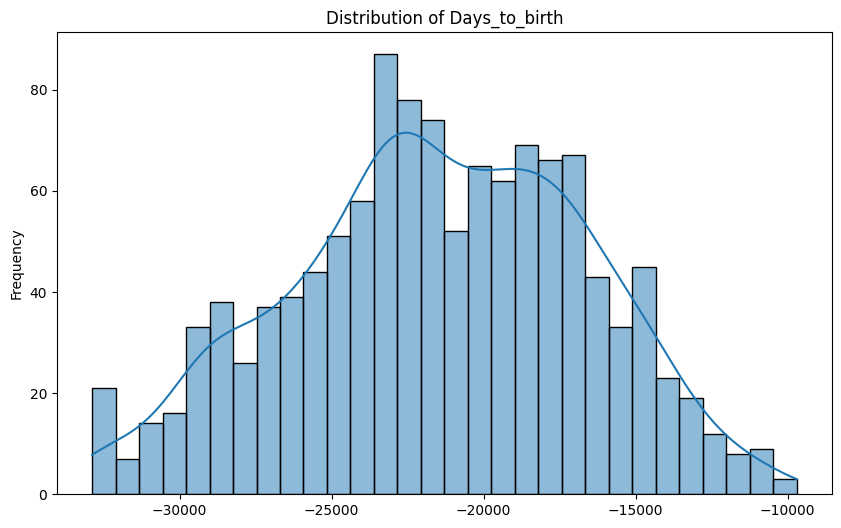

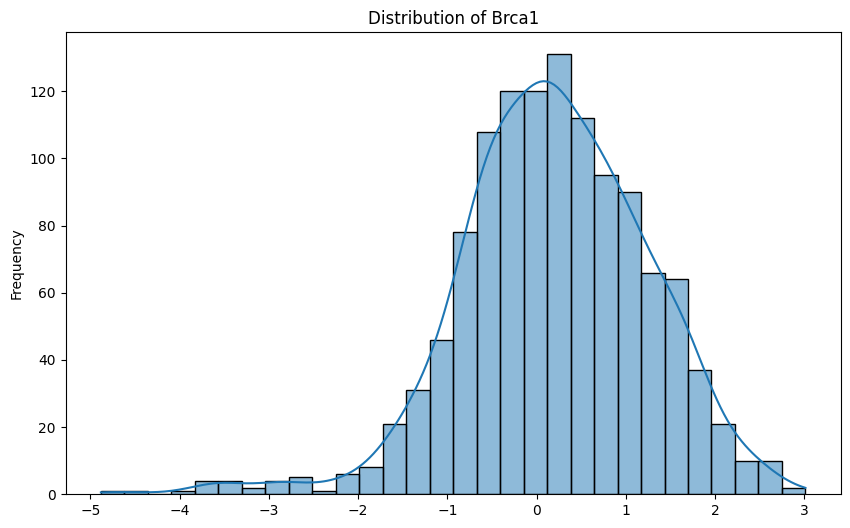

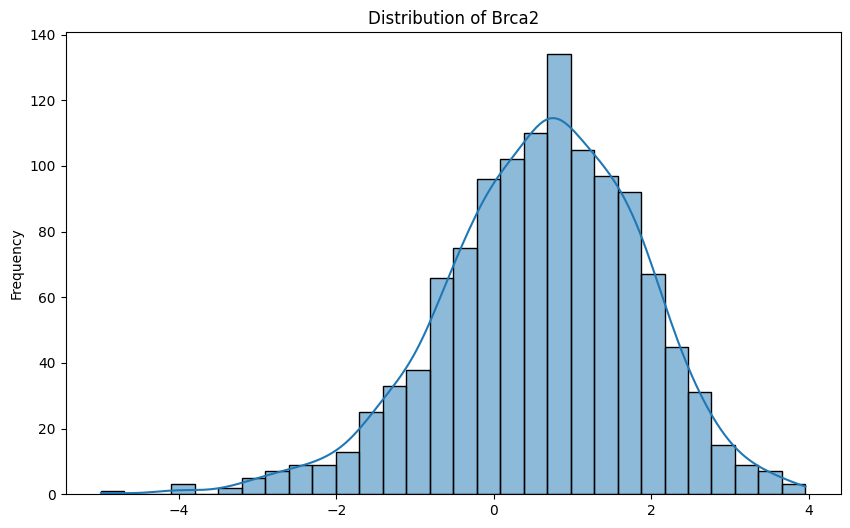

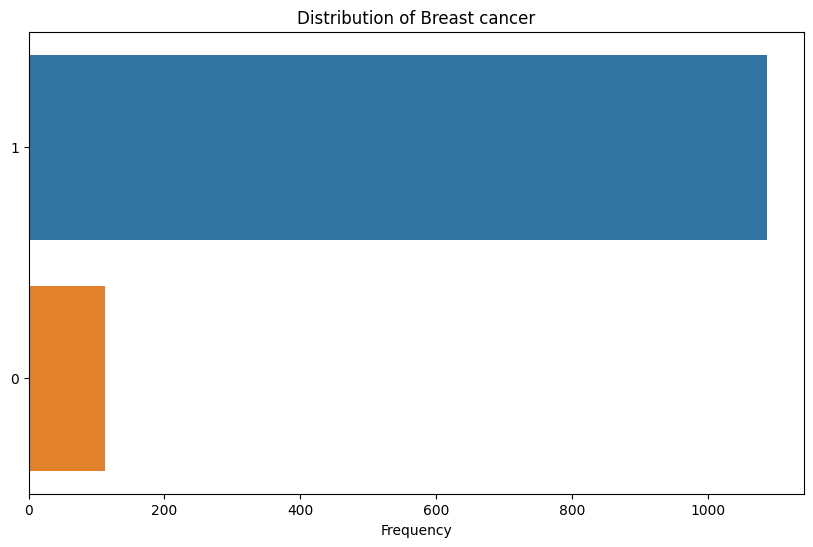

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

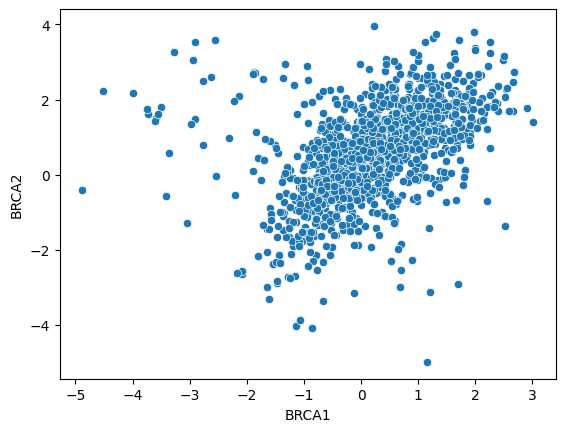

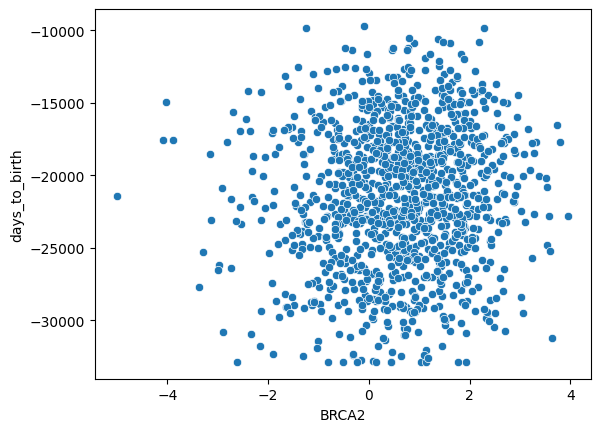

In [13]:
sns.scatterplot(data=merged_data, x='BRCA1', y='BRCA2')
plt.show()
sns.scatterplot(data=merged_data, x='BRCA2', y=condition_col)
plt.show()

In [14]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Breast Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,55,0.607308,-3.194126,-0.531035,-0.145872,0.237422,-0.29921,-0.142694,-0.217446,0.333001,...,0.565583,-0.767233,-1.28139,-0.271377,-0.492286,0.360373,1.067905,0.076267,-0.392212,1
TCGA-3C-AALI-01,50,-0.641192,-4.928226,0.095465,0.098128,-0.541978,-0.32291,-0.044694,-0.148846,1.841601,...,0.079683,0.475267,1.99661,0.161423,0.273714,0.644673,-0.428695,0.068667,-0.043812,1
TCGA-3C-AALJ-01,62,1.082808,-4.623726,-0.531035,0.484028,-0.183678,-0.91901,0.261106,0.687754,-0.423399,...,-0.656117,-0.216733,0.21081,0.101023,0.660514,1.295073,0.915105,0.168567,0.047788,1
TCGA-3C-AALK-01,52,0.121608,-2.881526,-0.531035,0.179128,0.039222,-0.45491,0.180306,0.775554,-0.423399,...,-0.178417,-0.211233,-1.28139,0.108023,1.132814,0.496773,0.240105,3.099767,0.112888,1
TCGA-4H-AAAK-01,50,0.420208,-3.282726,-0.531035,-0.020972,-0.117978,-0.55781,-0.173794,-1.079146,0.465001,...,-0.698717,-0.484233,-1.28139,-0.223577,1.222714,0.225573,-0.301995,0.200067,-0.080212,1


In [15]:
merged_data.values

array([[ 5.50000000e+01,  6.07307530e-01, -3.19412634e+00, ...,
         7.62667187e-02, -3.92212400e-01,  1.00000000e+00],
       [ 5.00000000e+01, -6.41192470e-01, -4.92822634e+00, ...,
         6.86667187e-02, -4.38123995e-02,  1.00000000e+00],
       [ 6.20000000e+01,  1.08280753e+00, -4.62372634e+00, ...,
         1.68566719e-01,  4.77876005e-02,  1.00000000e+00],
       ...,
       [ 6.80000000e+01,  6.71507530e-01,  5.13736637e-02, ...,
         2.57516672e+00,  1.21287600e-01,  1.00000000e+00],
       [ 6.00000000e+01,  2.91707530e-01, -3.02402634e+00, ...,
         3.65686672e+00,  2.55487600e-01,  1.00000000e+00],
       [ 4.60000000e+01,  4.39207530e-01, -3.50792634e+00, ...,
        -2.81933281e-01, -6.17123995e-02,  1.00000000e+00]])

In [16]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

d:\temp\temp\ipykernel_12104\2284219672.py:12: RuntimeWarning: invalid value encountered in true_divide
  X = (X - mean) / std
D:\Anaconda3\lib\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: invalid value encountered in true_divide
  ts = beta / np.sqrt(var * sigma)
D:\Anaconda3\lib\site-packages\sparse_lmm\VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.7824127728856287


In [17]:
var_select = VariableSelection()

var_select.fit(X, y)

coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [18]:
gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For brca:
BRCA1: Coefficient = -0.004593139278199841, p-value = 0.49608248597152016
BRCA2: Coefficient = 0.011402265155543469, p-value = 0.2214401406035802

For age:
age: Coefficient = -0.0026932155608851024, p-value = 0.5685959021525445



In [19]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between BRCA gene and Breast Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the BRCA gene and Breast Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the BRCA gene and Breast Cancer when considering the influence of age.




In [20]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: BRCA1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: BRCA2
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: age
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).




In [21]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: BRCA1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRCA1 gene and Breast Cancer when considering the influence of age.

Variable: BRCA2
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRCA2 gene and Breast Cancer when considering the influence of age.


